In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("../Veri-Toplama/computer_data_new.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   İşlemci Hızı             376 non-null    object 
 1   İşlemci Markası          404 non-null    object 
 2   İşlemci Nesli            255 non-null    object 
 3   İşlemci Numarası         331 non-null    object 
 4   İşlemci Teknolojisi      404 non-null    object 
 5   İşlemci Çekirdek Sayısı  382 non-null    object 
 6   İşlemci Ön Bellek        284 non-null    object 
 7   Marka                    408 non-null    object 
 8   url                      408 non-null    object 
 9   price                    408 non-null    float64
dtypes: float64(1), object(9)
memory usage: 32.0+ KB


In [4]:
drop_columns=["İşlemci Hızı","İşlemci Numarası","url"]   
data=data.drop(columns=drop_columns,axis=1)

In [5]:
# Marka isimlerini standartlaştırdım ve böylelikl aynı markayı temsil eden birden fazla isim olmayacak
marka_mapping = {
    'MacBook': 'Apple',
    'iPad': 'Apple',
    'ipad': 'Apple',
    'Ipad': 'Apple',
    'HP': 'Hp',
    'LENOVO': 'Lenovo',
    'ASUS': 'Asus',
    'CASPER': 'Casper',
    'APPLE': 'Apple',
    'MSI': 'Msi',
    
    # Diğer eşleştirmeler
}

# 'Marka' sütununu güncelleyerek standartlaştırılmış marka isimlerini ekledım
data['Marka'] = data['Marka'].map(marka_mapping).fillna(data['Marka'])

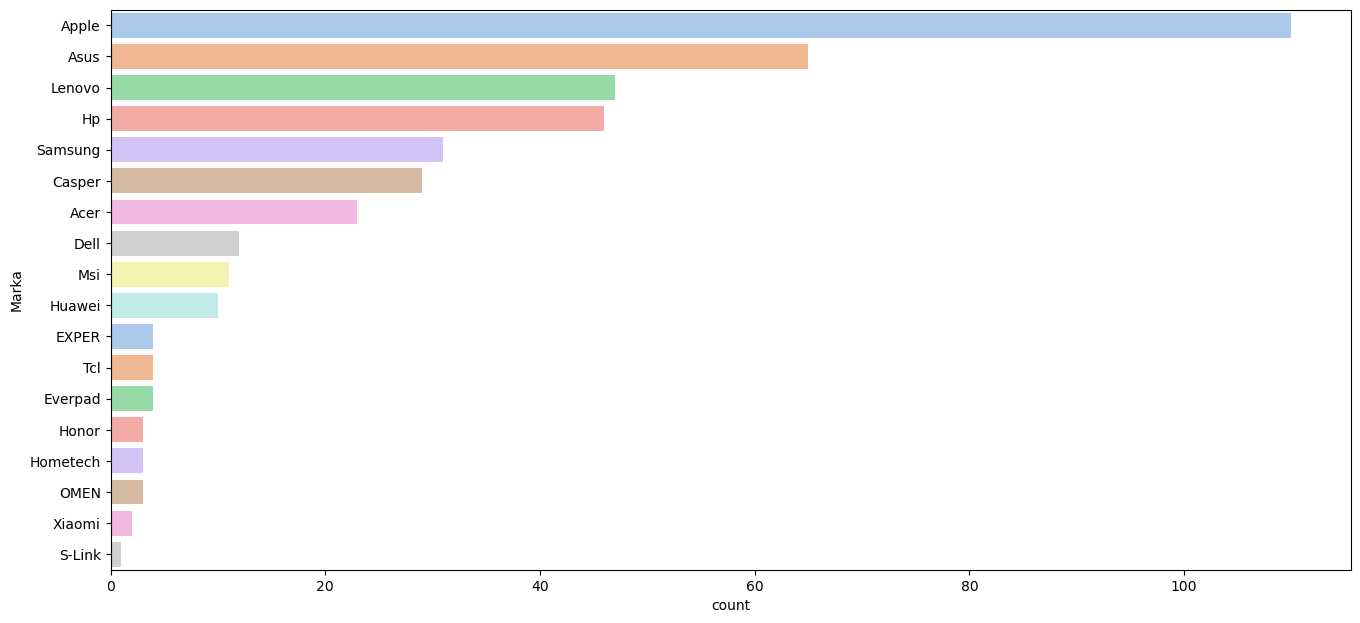

In [6]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
sns.countplot(y='Marka', data=data, order=data['Marka'].value_counts().index, palette="pastel")
plt.show()

In [7]:
data.head(20)

,İşlemci Markası,İşlemci Nesli,İşlemci Teknolojisi,İşlemci Çekirdek Sayısı,İşlemci Ön Bellek,Marka,price
0,Intel,12. Nesil,Core i5,10 Çekirdek,12 MB,Asus,16.999
1,Qualcomm,NaN,Snapdragon 685,8 Çekirdek,NaN,Honor,5.999
2,MediaTek,NaN,Octa Core,8 Çekirdek,NaN,Lenovo,3.499
3,Intel,12. Nesil,Core i5,8 Çekirdek,12 MB,Lenovo,16.999
4,Apple,NaN,A13,Belirtilmemiş,NaN,Apple,10.799
5,Samsung,NaN,Qualcomm SM6375,8 Çekirdek,NaN,Samsung,4.999
6,Intel,12. Nesil,Core i5,8 Çekirdek,12 MB,Lenovo,15.999
7,Intel,12. Nesil,Core i5,8 Çekirdek,12 MB,Asus,27.404
8,Unisoc,NaN,Octa Core,8,NaN,Lenovo,3.999
9,MediaTek,NaN,MT8183,8 Çekirdek,NaN,Casper,4.999


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   İşlemci Markası          404 non-null    object 
 1   İşlemci Nesli            255 non-null    object 
 2   İşlemci Teknolojisi      404 non-null    object 
 3   İşlemci Çekirdek Sayısı  382 non-null    object 
 4   İşlemci Ön Bellek        284 non-null    object 
 5   Marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB


In [9]:
data=data.rename(columns={
    "İşlemci Markası":"islemci_markasi",
    "İşlemci Nesli":"islemci_nesli",
    "İşlemci Teknolojisi":"islemci_teknolojisi",
    "İşlemci Çekirdek Sayısı":"islemci_cekirdek_sayisi",
    "İşlemci Ön Bellek": "islemci_on_bellek",
    "Marka":"marka"
})
print(data.columns)

Index(['islemci_markasi', 'islemci_nesli', 'islemci_teknolojisi',
       'islemci_cekirdek_sayisi', 'islemci_on_bellek', 'marka', 'price'],
      dtype='object')


In [10]:
data.loc[data.islemci_nesli=="13. Nesil","islemci_nesli"]="13"
data.loc[data.islemci_nesli=="12. Nesil","islemci_nesli"]="12"
data.loc[data.islemci_nesli=="Belirtilmemiş","islemci_nesli"]="10"
data.loc[data.islemci_nesli=="11. Nesil","islemci_nesli"]="11"
data.loc[data.islemci_nesli=="7. Nesil","islemci_nesli"]="7"
data.loc[data.islemci_nesli=="Intel 12.Nesil","islemci_nesli"]="12"
data.loc[data.islemci_nesli=="5. Nesil","islemci_nesli"]="5"
data.loc[data.islemci_nesli=="6. Nesil","islemci_nesli"]="6"
data.loc[data.islemci_nesli=="M3","islemci_nesli"]="13"
data.loc[data.islemci_nesli=="M2","islemci_nesli"]="12"
data.loc[data.islemci_nesli=="Intel 13.Nesil","islemci_nesli"]="13"
data.loc[data.islemci_nesli=="M1","islemci_nesli"]="9"
data.loc[data.islemci_nesli=="Intel 11.Nesil","islemci_nesli"]="11"
data.loc[data.islemci_nesli=="AMD Ryzen 5.Nesil","islemci_nesli"]="7"
data.loc[data.islemci_nesli=="AMD Ryzen 7.Nesil","islemci_nesli"]="11"
data.loc[data.islemci_nesli=="M2","islemci_nesli"]="12"
marka_listesi = data['islemci_nesli'].unique()
print(marka_listesi)

['12' nan '11' '10' '5' '13' '7' '6' '9']


In [11]:
# Başlangıcta bu featurdaki NaN degerleri görüntüledim
print(data['islemci_nesli'].isna().value_counts())

# NaN değerlerinin indekslerini belirledim
nan_indices = data[data['islemci_nesli'].isna()].index

# Belirtilen değerleri sıra sıra NaN değerlerine atadım
replacement_values = ['12', '11', '10', '5', '13', '7', '6', '9']
replacement_iter = iter(replacement_values)

for index in nan_indices:
    try:
        data.at[index, 'islemci_nesli'] = next(replacement_iter)
    except StopIteration:
        # İterasyon sona erdiğinde, yeni bir iterasyon başlattırdım
        replacement_iter = iter(replacement_values)
        data.at[index, 'islemci_nesli'] = next(replacement_iter)

# Değiştirme işlemi sonrası sayıyı kontrol ettim
print(data['islemci_nesli'].isna().value_counts())

islemci_nesli
False    255
True     153
Name: count, dtype: int64
islemci_nesli
False    408
Name: count, dtype: int64


In [12]:
nan_indices = data[data['islemci_markasi'].isna()].index
print("NaN olan satırların indeksleri:")
print(nan_indices)

# Belirtilen indekslerdeki 'islemci_markasi' sütununu "Apple" ile doldurdum.Çünkü Apple ürün sayısı daha fazlaydı
data.loc[nan_indices, 'islemci_markasi'] = "Apple"

# Değiştirme işlemi sonrası 'islemci_markasi' sütununundaki NaN degerleri kontrol ettim
print("\nDeğiştirme işlemi sonrası 'islemci_markasi' sütunu:")
print(data['islemci_markasi'])


NaN olan satırların indeksleri:
Index([50, 271, 336, 368], dtype='int64')

Değiştirme işlemi sonrası 'islemci_markasi' sütunu:
0         Intel
1      Qualcomm
2      MediaTek
3         Intel
4         Apple
         ...   
403       Apple
404       Apple
405       Apple
406       Intel
407       Apple
Name: islemci_markasi, Length: 408, dtype: object


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      404 non-null    object 
 3   islemci_cekirdek_sayisi  382 non-null    object 
 4   islemci_on_bellek        284 non-null    object 
 5   marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB


In [14]:
# 'islemci_teknolojisi' sütunundaki en çok tekrar eden değerleri bul
most_common_technologies = data['islemci_teknolojisi'].value_counts().head()
print(most_common_technologies)


islemci_teknolojisi
Core i5    85
Core i7    66
M2         39
Core i9    23
M1         22
Name: count, dtype: int64


In [15]:
data['islemci_teknolojisi'].fillna("Core i5", inplace=True) # NaN degerleri en fazla olan atadım

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      408 non-null    object 
 3   islemci_cekirdek_sayisi  382 non-null    object 
 4   islemci_on_bellek        284 non-null    object 
 5   marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB


In [17]:
data.islemci_cekirdek_sayisi.value_counts()

islemci_cekirdek_sayisi
8 Çekirdek       134
12 Çekirdek       40
6 Çekirdek        33
10 Çekirdek       32
14 Çekirdek       31
4 Çekirdek        21
24 Çekirdek       19
8                 18
Belirtilmemiş     17
2 Çekirdek        10
16 Çekirdek       10
6                  6
12                 3
4                  2
11 Çekirdek        2
10                 2
2                  1
16                 1
Name: count, dtype: int64

In [18]:
data["islemci_cekirdek_sayisi"]=data["islemci_cekirdek_sayisi"].str.replace(" Çekirdek","")

In [19]:
data.islemci_cekirdek_sayisi.value_counts()

islemci_cekirdek_sayisi
8                152
12                43
6                 39
10                34
14                31
4                 23
24                19
Belirtilmemiş     17
2                 11
16                11
11                 2
Name: count, dtype: int64

In [20]:
# Belirtilmemiş değerlere sahip olan satırların indekslerini ve sayısını buldum
belirtilmemis_indices = data[data['islemci_cekirdek_sayisi'] == 'Belirtilmemiş'].index
total_belirtilmemis = len(belirtilmemis_indices)

# Sırasıyla '8', '12', '6', '10', '14', '4', '24', '2', '16', '11' değerlerini atayarak döngüyü devam ettirdim
new_values = ['8', '12', '6', '10', '14', '4', '24', '2', '16', '11']

for i, index in enumerate(belirtilmemis_indices): # Belirtilmemişleri verileri sırayla bu kategorik verilere atadım
    new_value = new_values[i % len(new_values)] 
    data.at[index, 'islemci_cekirdek_sayisi'] = new_value

data.islemci_cekirdek_sayisi.value_counts()

islemci_cekirdek_sayisi
8     154
12     45
6      41
10     36
14     33
4      25
24     21
2      12
16     12
11      3
Name: count, dtype: int64

In [21]:
data.info()
# NaN degerleri 11'e atadım çünkü islemci_cekirdek_sayisi kategorik verilerin ortalaması bu şekilde geliyordu
data['islemci_cekirdek_sayisi'].fillna('11', inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      408 non-null    object 
 3   islemci_cekirdek_sayisi  382 non-null    object 
 4   islemci_on_bellek        284 non-null    object 
 5   marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      408 non

In [22]:
# NaN degerleri 11'e atadım çünkü islemci_on_bellek kategorik verilerin ortalaması bu şekilde geliyordu
data['islemci_on_bellek'] = data['islemci_on_bellek'].fillna('20 MB')
data.islemci_on_bellek.info()


<class 'pandas.core.series.Series'>
RangeIndex: 408 entries, 0 to 407
Series name: islemci_on_bellek
Non-Null Count  Dtype 
--------------  ----- 
408 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [23]:
data["price"] = data["price"].astype(str)
for i in range(0,100):
    data["price"]=data.price.str.replace(',{}'.format(i),'')

data["price"]=data.price.str.replace(',00'.format(i),'')
data["price"]=data.price.str.replace(',01'.format(i),'')
data["price"]=data.price.str.replace(',02'.format(i),'')
data["price"]=data.price.str.replace(',03'.format(i),'')
data["price"]=data.price.str.replace(',04'.format(i),'')
data["price"]=data.price.str.replace(',05'.format(i),'')
data["price"]=data.price.str.replace(',06'.format(i),'')
data["price"]=data.price.str.replace(',07'.format(i),'')
data["price"]=data.price.str.replace(',08'.format(i),'')
data["price"]=data.price.str.replace(',09'.format(i),'')
data["price"]=data.price.str.replace('.','')

data["price"]=data.price.astype(float)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      408 non-null    object 
 3   islemci_cekirdek_sayisi  408 non-null    object 
 4   islemci_on_bellek        408 non-null    object 
 5   marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB


In [24]:
data["islemci_on_bellek"]=data.islemci_on_bellek.str.replace('MB','')

data['islemci_on_bellek'] = data['islemci_on_bellek'].replace('Paylaşılmıyor', '20')
data['islemci_on_bellek'] = data['islemci_on_bellek'].replace('20 ', '20')

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    object 
 1   islemci_nesli            408 non-null    object 
 2   islemci_teknolojisi      408 non-null    object 
 3   islemci_cekirdek_sayisi  408 non-null    object 
 4   islemci_on_bellek        408 non-null    object 
 5   marka                    408 non-null    object 
 6   price                    408 non-null    float64
dtypes: float64(1), object(6)
memory usage: 22.4+ KB


In [25]:
# LabelEncoder'a geçmeden yani bazı verileri indekslemeden csv'ye yazdırdım
data.head()
data.to_csv("./processed_data_before_label_encoder.csv",index=False)

In [26]:
data.marka.value_counts()

marka
Apple       110
Asus         65
Lenovo       47
Hp           46
Samsung      31
Casper       29
Acer         23
Dell         12
Msi          11
Huawei       10
EXPER         4
Tcl           4
Everpad       4
Honor         3
Hometech      3
OMEN          3
Xiaomi        2
S-Link        1
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder


In [28]:
# LabelEncoder'ı oluşturdum
label_encoder = LabelEncoder()

# 'islemci_markasi' sütunundaki kategorik değerleri sayısal değerlere dönüştürdüm
data['islemci_markasi'] = label_encoder.fit_transform(data['islemci_markasi'])

In [29]:
data['islemci_nesli'] = data['islemci_nesli'].astype(float)
data['islemci_cekirdek_sayisi'] = data['islemci_cekirdek_sayisi'].astype(float)
data['islemci_on_bellek'] = data['islemci_on_bellek'].astype(float)


In [30]:
label_encoder_teknoloji = LabelEncoder()

# 'islemci_teknolojisi' sütunundaki kategorik değerleri sayısal değerlere dönüştürdüm
data['islemci_teknolojisi'] = label_encoder_teknoloji.fit_transform(data['islemci_teknolojisi'])



In [31]:
label_encoder_marka = LabelEncoder()
# 'marka' sütunundaki kategorik değerleri sayısal değerlere dönüştürdüm
data['marka'] = label_encoder_marka.fit_transform(data['marka'])

In [32]:
data


,islemci_markasi,islemci_nesli,islemci_teknolojisi,islemci_cekirdek_sayisi,islemci_on_bellek,marka,price
0,3,12.0,7,10.0,12.0,2,16999.0
1,5,12.0,41,8.0,20.0,8,5999.0
2,4,11.0,27,8.0,20.0,11,3499.0
3,3,12.0,7,8.0,12.0,11,16999.0
4,1,10.0,2,8.0,20.0,1,10799.0
...,...,...,...,...,...,...,...
403,1,6.0,15,8.0,20.0,1,70999.0
404,1,9.0,3,6.0,20.0,1,25899.0
405,1,12.0,3,6.0,20.0,1,18999.0
406,3,11.0,9,8.0,24.0,11,109999.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   islemci_markasi          408 non-null    int32  
 1   islemci_nesli            408 non-null    float64
 2   islemci_teknolojisi      408 non-null    int32  
 3   islemci_cekirdek_sayisi  408 non-null    float64
 4   islemci_on_bellek        408 non-null    float64
 5   marka                    408 non-null    int32  
 6   price                    408 non-null    float64
dtypes: float64(4), int32(3)
memory usage: 17.7 KB


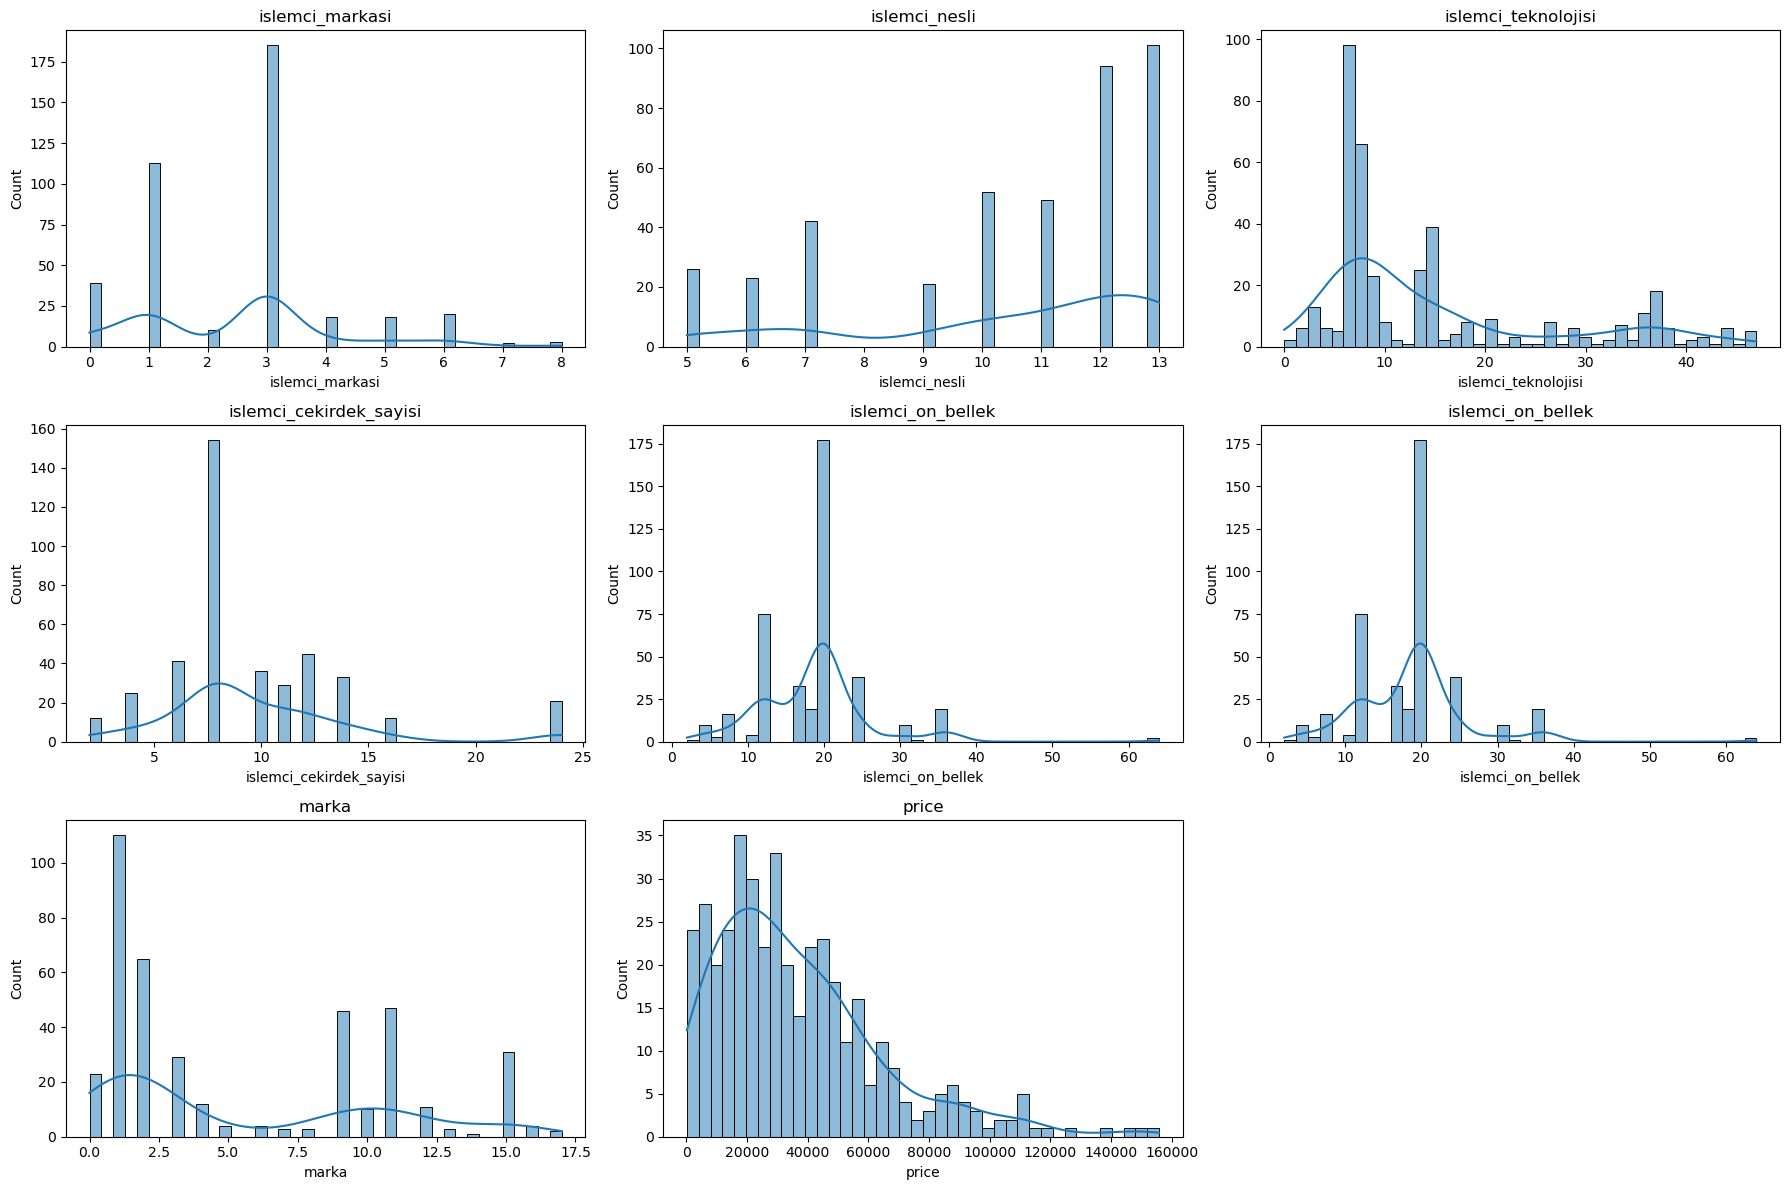

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  

columns = ["islemci_markasi",
           "islemci_nesli",
           "islemci_teknolojisi",
           "islemci_cekirdek_sayisi",
           "islemci_on_bellek",
           "islemci_on_bellek",
           "marka",
           "price"]

def distplot(nrows, ncols, columns, data):
    rows = nrows
    cols = ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    index = 0

    for i in range(rows):
        for j in range(cols):
            # Check if there are more columns to plot
            if index < len(columns):
                sns.histplot(data[columns[index]], ax=ax[i][j], bins=40, kde=True)
                ax[i][j].set_title(columns[index])
                index += 1
            else:
                # If there are no more columns, remove empty subplots
                fig.delaxes(ax[i][j])

    # Adjust layout to prevent overlap of titles
    plt.tight_layout()
    plt.show()

# Call the function with your desired number of rows, columns, columns list, and data
distplot(3, 3, columns, data)


In [35]:
data.to_csv("../computer-training.csv",index=False)